# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

!pip install citipy pandas requests matplotlib scipy

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(-90.0, 90.0, size=1500)
lngs = np.random.uniform(-180.0, 180.0, size=1500)
coordinates = list(zip(lats, lngs))

cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
api_key = "bbca750297e7bcd07554c850efb31950"
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =    city_url = f"{url}?q={city}&appid={api_key}&units=metric"
    response = requests.get(city_url)
    if response.status_code == 200:
        city_data.append(response.json())

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City {city} not found or other error: {e}")
    pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klyuchi
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | kauhajoki
Processing Record 4 of Set 1 | mathis
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | peace river
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | montepuez
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | alotau
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | rio piracicaba
Processing Record 20 of Set 1 | moussoro
Processing Record 21 of Set 1 | tsiombe
Processing Record 22 of Set 1 | margaret river
Processing Re

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [25]:
# Display sample data
city_data_df.head()

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,...,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,rain,snow
0,"{'lon': 79.1667, 'lat': 52.2667}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 33.17, 'feels_like': 31.36, 'temp_min...",10000.0,"{'speed': 4.28, 'deg': 89, 'gust': 5.06}",{'all': 0},1.722582e+09,"{'country': 'RU', 'sunrise': 1722553546, 'suns...",25200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.2667,79.1667,33.17,23.0,0.0,4.28,RU,1.722582e+09,NaN,NaN
2,"{'lon': 15.6401, 'lat': 78.2186}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 12.91, 'feels_like': 12.24, 'temp_min...",10000.0,"{'speed': 2.06, 'deg': 280}",{'all': 0},1.722582e+09,"{'type': 1, 'id': 1663, 'country': 'SJ', 'sunr...",7200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.2186,15.6401,12.91,76.0,0.0,2.06,SJ,1.722582e+09,NaN,NaN
4,"{'lon': 22.1833, 'lat': 62.4333}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 15.62, 'feels_like': 15.56, 'temp_min...",10000.0,"{'speed': 1.79, 'deg': 299, 'gust': 4.47}",{'all': 100},1.722582e+09,"{'type': 2, 'id': 2080205, 'country': 'FI', 's...",10800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

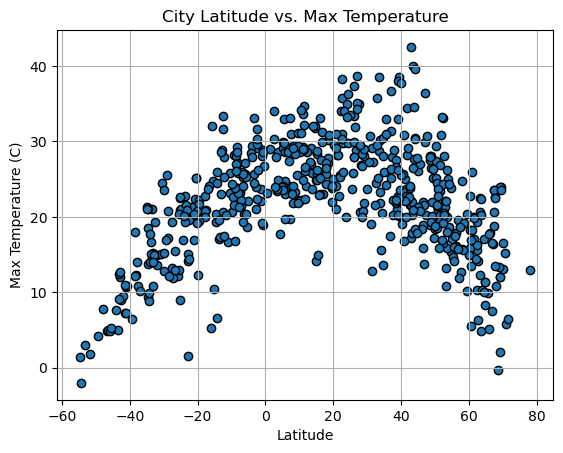

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

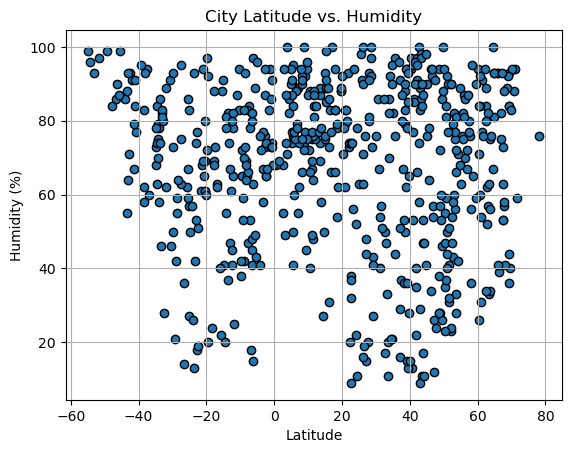

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

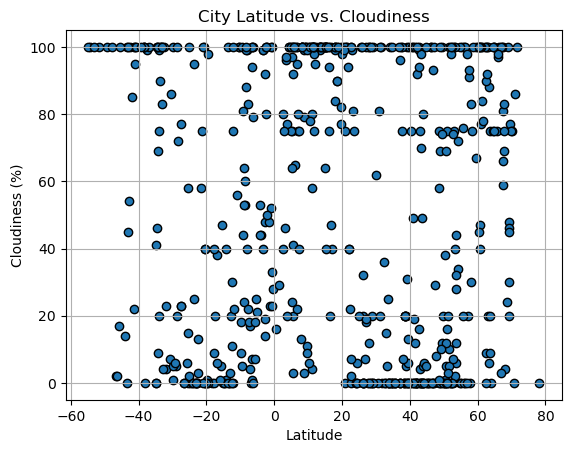

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

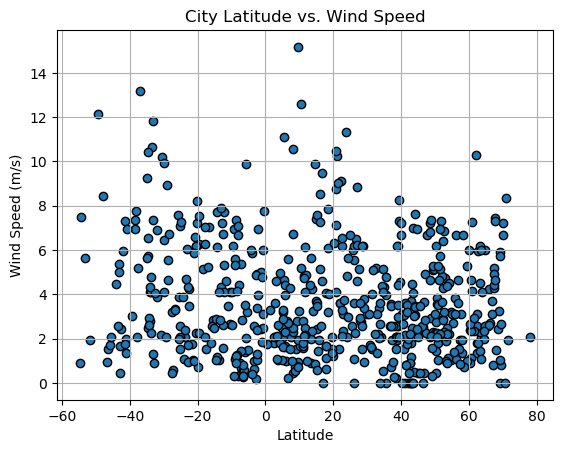

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import matplotlib.pyplot as plt

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Annotate the line equation and r-squared value
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.grid(True)
    plt.show()
    
    # Print r-squared value
    print(f"r-squared: {rvalue**2}")

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,...,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,rain,snow
City_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.2667,79.1667,33.17,23.0,0.0,4.28,RU,1.722582e+09,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.2186,15.6401,12.91,76.0,0.0,2.06,SJ,1.722582e+09,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.4333,22.1833,15.62,89.0,100.0,1.79,FI,1.722582e+09,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.0945,-97.8280,26.85,93.0,100.0,2.77,US,1.722582e+09,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4112,100.3354,32.97,50.0,20.0,4.63,MY,1.722582e+09,NaN,NaN


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3940754297489331


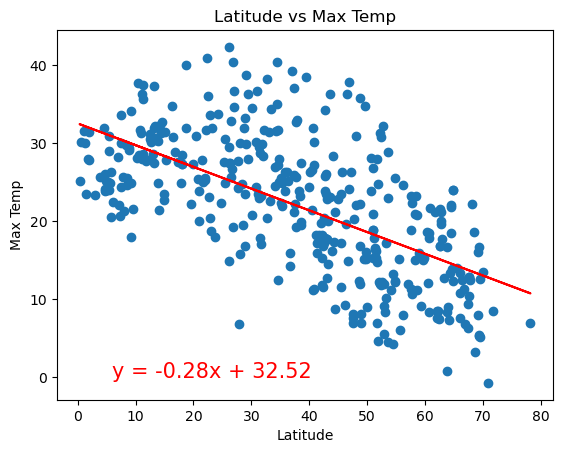

In [15]:
# Linear regression on Northern Hemisphere
# Linear regression on Northern Hemisphere: Temperature vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (C)")

The r^2-value is: 0.6720220238897325


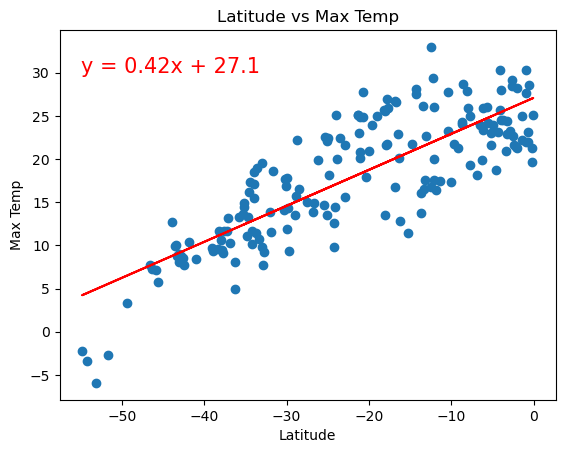

In [16]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere: Temperature vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (C)")

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


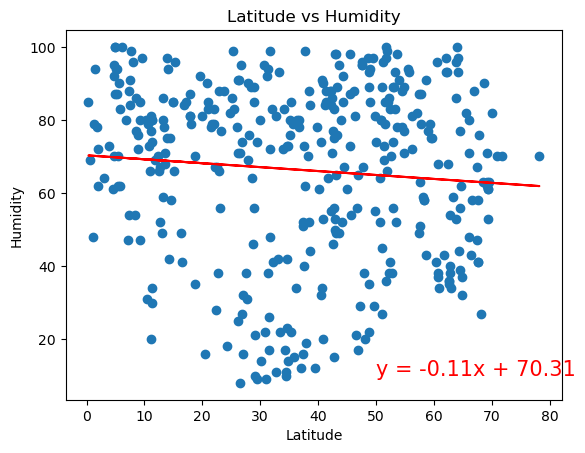

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere: Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")

The r^2-value is: 0.00014367159540169783


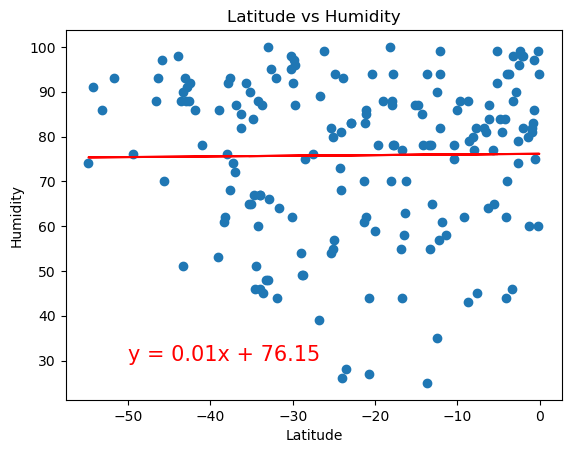

In [23]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere: Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


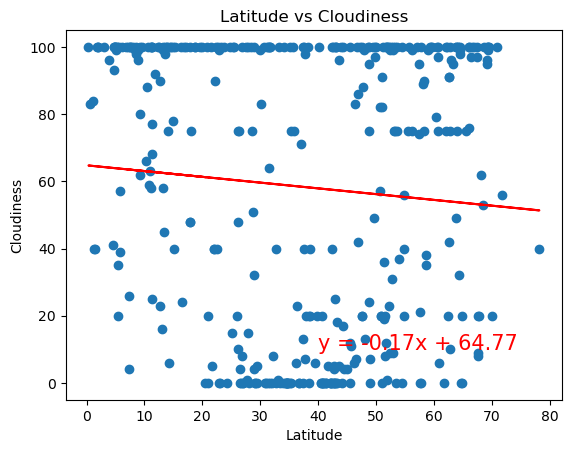

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere: Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")

The r^2-value is: 0.018616831531634456


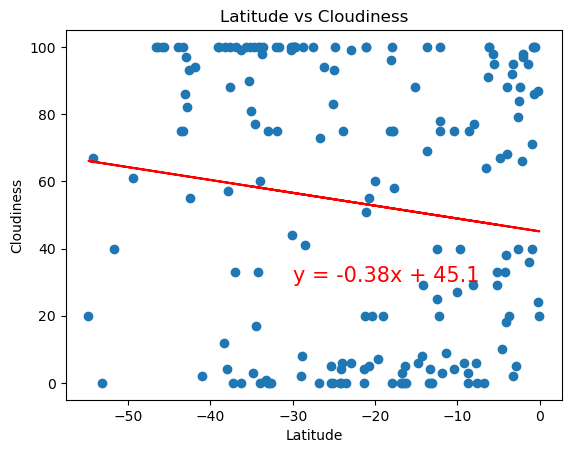

In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere: Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


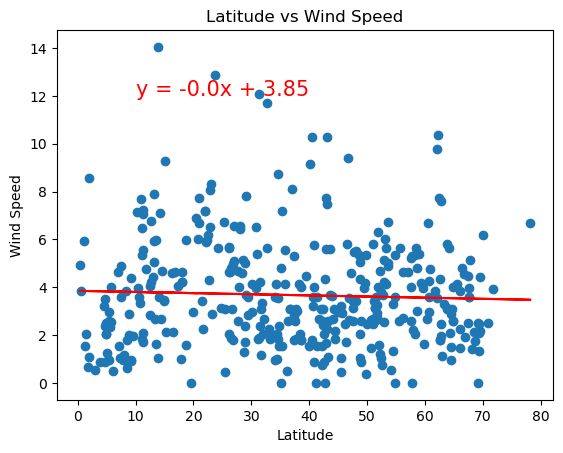

In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere: Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")

The r^2-value is: 0.06495869418886388


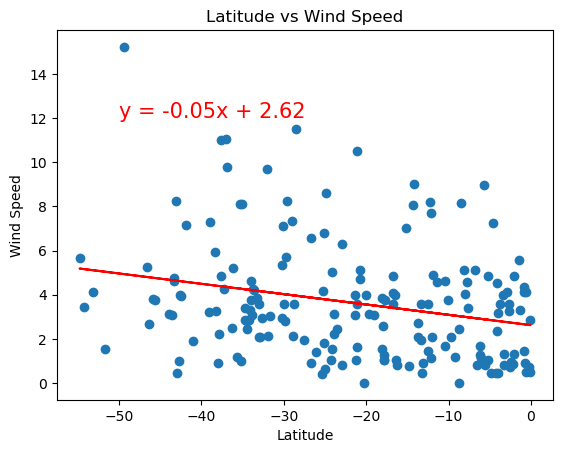

In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere: Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")